In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [2]:
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt
from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out.basics import create_dir
from geo_tool import Point_Cloud

from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from tf_lab.iclr.helper import load_multiple_version_of_pcs

In [24]:
from tf_lab.gans.vanilla_gan import Vanilla_GAN
from tf_lab.gans.w_gan_gp import W_GAN_GP

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator,\
point_cloud_generator, leaky_relu

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
save_model = False
do_training = True
plot_train_curve = True
max_epochs = 2000
save_syn_step = 100
save_synthetic_samples = np.hstack([np.array([1, 5, 10]), 
                                    np.arange(save_syn_step, max_epochs + 1, 
                                              save_syn_step)])
do_wgan = True

In [11]:
if do_wgan:
    gan_tag = 'r_w_gan'
else:
    gan_tag = 'r_gan'

In [12]:
class_name = 'chair'
# = raw_input('Give me the class type.\n').lower()
syn_id = snc_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples_new/r_gan/'

In [17]:
n_pc_points = 2048
beta = 0.5

discriminator = mlp_discriminator
generator = point_cloud_generator
gen_kwargs = {'b_norm': [False]}

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.2}
noise_dim = 128
init_lr = 0.0001


if do_wgan:
    arch_tag = 'mlp_pc_gen_default'
    disc_kwargs = {'b_norm': [False]}
else:    
    arch_tag = 'mlp_pc_gen_default_leak_20'
    leak = 0.2
    disc_kwargs = {'non_linearity': leaky_relu(leak), 'b_norm': [False]}


n_output = [n_pc_points, 3]
experiment_name = '_'.join([class_name, arch_tag, gan_tag, str(n_pc_points) + '_pts'])

In [14]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)
training_data = in_data['train']
n_syn_samples = training_data.num_examples  # Same number as original GT data.

679 pclouds were loaded. They belong in 1 shape-classes.
5761 pclouds were loaded. They belong in 1 shape-classes.
338 pclouds were loaded. They belong in 1 shape-classes.


In [25]:
reset_tf_graph()

if do_wgan:
    lam = 10
    gan = W_GAN_GP(experiment_name, init_lr, lam, n_output, noise_dim,
                    discriminator, generator,
                    disc_kwargs=disc_kwargs, beta=beta)
    
else:    
    gan = Vanilla_GAN(experiment_name, init_lr, n_output, noise_dim,
                 discriminator, generator, beta=beta, 
                 gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (-0.0373581200838089, -0.1585784779770462) 32.3932471275


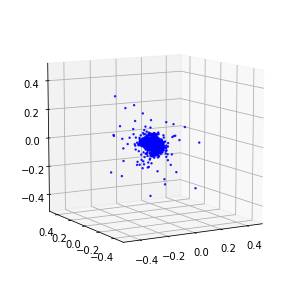

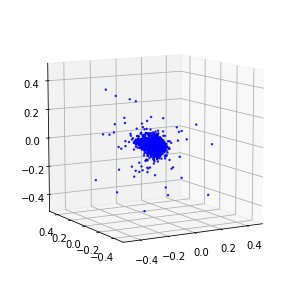

2 (-0.14820101403671762, 0.5893679343811844) 32.890155077
3 (-0.249262080633122, 0.36350243635799573) 34.2853429317
4 (-0.2840147155782451, 0.588977979577106) 33.8380348682
5 (-0.27555544855801956, 0.6310396298118259) 31.6745569706


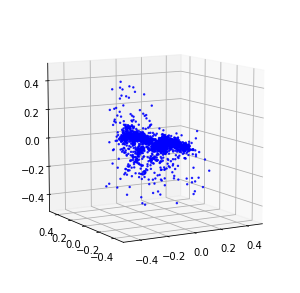

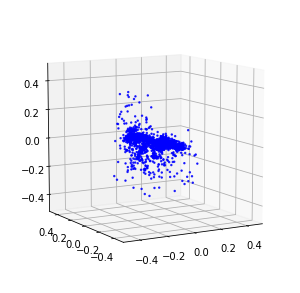

6 (-0.29129092822904173, 0.6310054141542186) 31.9148640633
7 (-0.3010440459717875, 0.6790632061336351) 33.3941941261
8 (-0.303334137926931, 0.6747251749038696) 33.3038699627
9 (-0.2866784899131111, 0.7361388634080472) 36.7244520187
10 (-0.25369181918061295, 0.7171203286751456) 35.4521150589


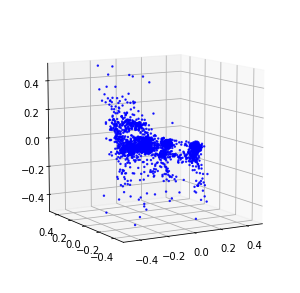

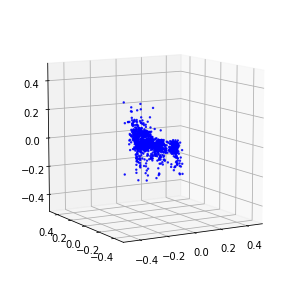

11 (-0.17295399223980695, 0.7378139016420945) 32.2931268215
12 (-0.16618072469921216, 0.8484121593444244) 33.5448958874
13 (-0.14953979674888693, 0.862100469029468) 33.8226950169
14 (-0.18377773975548536, 0.9412711081297501) 34.7585849762
15 (-0.2055044412612915, 1.0883464243101038) 34.1988577843
16 (-0.2199004529610924, 1.1849905356116917) 33.5921349525
17 (-0.2112028243749038, 1.2633791436319766) 33.8272008896
18 (-0.19687608013982358, 1.2934261197629182) 34.7236359119
19 (-0.1938706558683644, 1.314757694368777) 46.9590640068
20 (-0.18162627893945446, 1.2923074079596477) 40.672837019
21 (-0.17398390251657236, 1.2672607328580774) 38.1640841961
22 (-0.17298899105061655, 1.1982968527337778) 42.2081511021
23 (-0.17574496923581415, 1.2275758463403452) 38.0612740517
24 (-0.17013378311758456, 1.2252482849618662) 41.6341290474
25 (-0.16985160701948662, 1.1721093447312065) 43.1452219486
26 (-0.16556614825259083, 1.1537323205367378) 38.8642599583
27 (-0.1619225255821062, 1.1164683673692786) 35

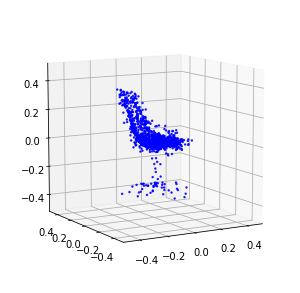

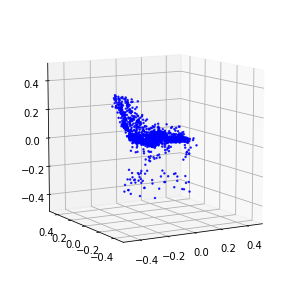

101 (-0.07975062575677166, 0.44299168301665265) 49.8252210617
102 (-0.08113957254782966, 0.4761828572853752) 49.062582016
103 (-0.0810346199442511, 0.4735102821951327) 49.2537748814
104 (-0.0765069478555866, 0.4752198120822077) 49.1800730228
105 (-0.08006506623781245, 0.47268753336823505) 33.0281829834
106 (-0.07507068900310475, 0.44670143593912537) 23.9240670204
107 (-0.07793771141897077, 0.4758997144906417) 23.6846511364
108 (-0.0746012670190438, 0.44164507414983667) 32.4827389717
109 (-0.07499421906212102, 0.42205623375332874) 24.4452030659
110 (-0.07655125046553819, 0.4417947647364243) 46.3986020088
111 (-0.07618559833777988, 0.4600822497969088) 26.5113661289
112 (-0.07577670015718625, 0.40009562995122827) 29.4723508358
113 (-0.0738538154117439, 0.4109918941622195) 25.2470841408
114 (-0.07583614500320476, 0.4252560099829798) 54.202203989
115 (-0.07565279261249563, 0.4037630039712657) 49.0010311604
116 (-0.0749403306323549, 0.4282461599163387) 43.7239649296
117 (-0.0733218223342429,

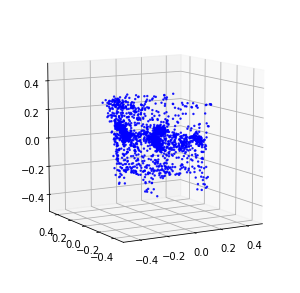

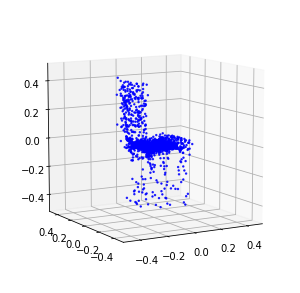

201 (-0.05764170221012572, 0.19843819543071414) 45.9213819504
202 (-0.05877681066808493, 0.21628960643125617) 47.3943889141
203 (-0.05948037351279155, 0.19954324189735495) 48.6204180717
204 (-0.05790338357505591, 0.19306550336920697) 47.6123549938
205 (-0.05803136051349018, 0.2376645460076954) 48.3903791904
206 (-0.05783617528884307, 0.2463101090296455) 48.2935018539
207 (-0.05743388462325801, 0.2214409109690915) 48.1558508873
208 (-0.05852654417571814, 0.22736239886802176) 47.4039268494
209 (-0.05760376422625521, 0.22111693542936575) 47.5388069153
210 (-0.057728491318614586, 0.21649783137051956) 49.6779830456
211 (-0.05709859421071799, 0.22189336917970492) 47.1915640831
212 (-0.058362433111862, 0.20284519117811453) 47.9773950577
213 (-0.05532327653921169, 0.22963003133950027) 47.1918849945
214 (-0.05571322863840539, 0.23115668802157693) 48.4557468891
215 (-0.05725240532470786, 0.2112323019815528) 47.9235141277
216 (-0.05583105326994606, 0.2200626024733419) 49.8896381855
217 (-0.057172

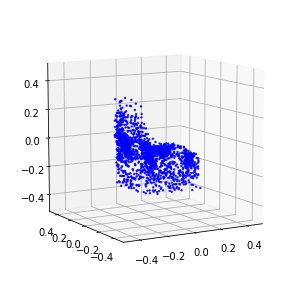

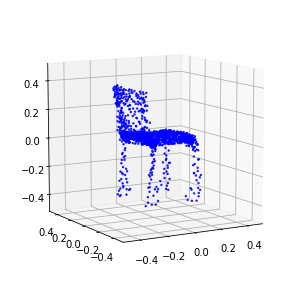

301 (-0.04926228345088337, 0.16895396748314734) 49.3964772224
302 (-0.04756792378814324, 0.1778065513657487) 48.5728030205
303 (-0.05037003713457481, 0.17942392955655637) 50.133589983
304 (-0.04961856616579968, 0.16639686213887256) 50.586274147
305 (-0.04713954450967519, 0.18709158832612244) 49.379734993
306 (-0.04957802349134632, 0.18675430637338888) 49.167509079
307 (-0.04902318042257558, 0.18087348244760348) 47.6929249763
308 (-0.04948458501502224, 0.1938943451513415) 49.9703190327
309 (-0.04894581309155278, 0.19736061990261078) 49.4905049801
310 (-0.04701135181214498, 0.16530088724001593) 49.434278965
311 (-0.050215376055111054, 0.1899303933200629) 50.3613278866
312 (-0.04852127239270055, 0.20068240748799365) 49.0227649212
313 (-0.0480556008770414, 0.20402309428090634) 48.646805048
314 (-0.047660859042535655, 0.2135962487562843) 47.9893231392
315 (-0.04945609026143084, 0.20315541391787323) 48.9262180328
316 (-0.048272634686335275, 0.16685674242351367) 47.0429890156
317 (-0.04830701

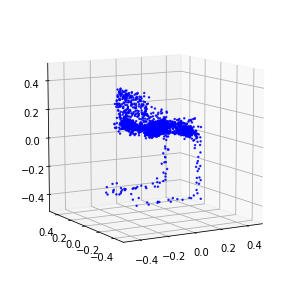

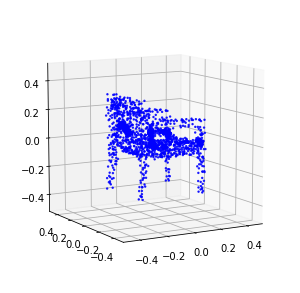

401 (-0.04481103123854036, 0.16335551829441733) 49.3689990044
402 (-0.04160300480282825, 0.14545999111040778) 47.9329679012
403 (-0.04333516239472057, 0.15818147620429163) 49.381221056
404 (-0.04526565640192965, 0.15337620060081067) 48.1338841915
405 (-0.04355618126042511, 0.1663667394415192) 53.0769939423
406 (-0.043554052370397944, 0.17583166386770166) 47.2322528362
407 (-0.04330001044208589, 0.1806366132653278) 48.7903969288
408 (-0.042747590302125264, 0.17856135996787445) 47.2719390392
409 (-0.04221516684831485, 0.18516768191171729) 45.3016729355
410 (-0.042913351062199345, 0.16952109887548114) 47.0652639866
411 (-0.04410160010599572, 0.15355277514976004) 48.5457589626
412 (-0.04220395983885164, 0.17193489294985068) 48.9038369656
413 (-0.042949242322989134, 0.16188537167466205) 47.1924319267
414 (-0.04338768171551435, 0.1788796546018642) 47.2751159668
415 (-0.040932172245305515, 0.16651427486668463) 47.2896900177
416 (-0.042087805263050226, 0.17571227544027826) 49.1949169636
417 (-

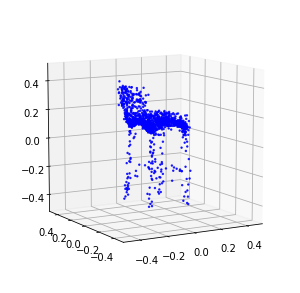

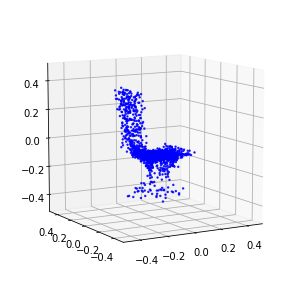

501 (-0.04192511120244213, 0.1914627367387647) 47.7614150047
502 (-0.0403111690412397, 0.1660394927729731) 37.6502599716
503 (-0.04244413464937521, 0.16688762410827304) 50.2085051537
504 (-0.039568899758160116, 0.1740410185378531) 50.5731060505
505 (-0.043210879923856776, 0.19054062081419904) 48.0880589485
506 (-0.03942774817671465, 0.17468127349148627) 47.4696829319
507 (-0.04114125479498635, 0.18968269617661185) 46.5324029922
508 (-0.04061858903454698, 0.1699482134502867) 49.9772319794
509 (-0.039290747386605845, 0.1787631842105285) 47.2839031219
510 (-0.04188939913621415, 0.18115185557500177) 48.9001858234
511 (-0.04089426478452009, 0.1731195171242175) 46.9010620117
512 (-0.041584218204345394, 0.170059685797795) 48.7095088959
513 (-0.039086587986220486, 0.1575450106807377) 47.0977010727
514 (-0.04035018767513659, 0.17320636789435925) 47.7021849155
515 (-0.04015887962735218, 0.178358883637449) 48.2757909298
516 (-0.04058931897515836, 0.16601996512516684) 47.3945839405
517 (-0.0402047

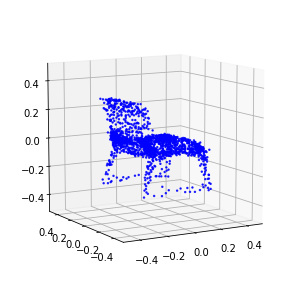

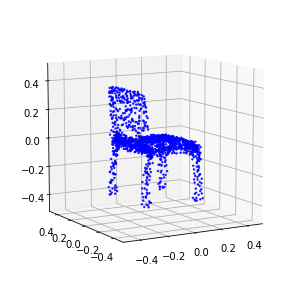

601 (-0.037494109222746416, 0.2033146820638491) 47.6682980061
602 (-0.03793428166081076, 0.16630130585121072) 48.1120870113
603 (-0.037163610383868215, 0.17444333045378976) 47.716520071
604 (-0.038232574247471666, 0.1586726664201073) 47.9136312008
605 (-0.03811730859072312, 0.1489925938455955) 48.3216891289
606 (-0.039635997411349544, 0.15846632809742636) 47.535048008
607 (-0.03916615079278531, 0.14181707961403806) 51.121090889
608 (-0.038237027767235816, 0.16777916868095813) 48.2742011547
609 (-0.03603445281801016, 0.13772897033587747) 47.6653409004
610 (-0.03894939688236817, 0.1562602607452351) 47.8810651302
611 (-0.03933380779850742, 0.14597768385125243) 50.904392004
612 (-0.03673343511055345, 0.14666966899581577) 47.3642129898
613 (-0.03814923630460449, 0.16784150218186172) 48.3962500095
614 (-0.038650560759655804, 0.1606072404462358) 48.3217890263
615 (-0.038378126360476016, 0.1629178673028946) 47.2325270176
616 (-0.039565804916555466, 0.17494776197101758) 45.8785791397
617 (-0.03

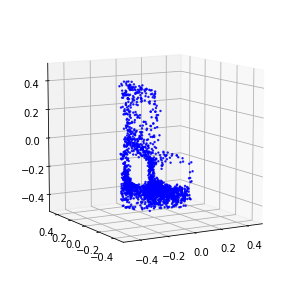

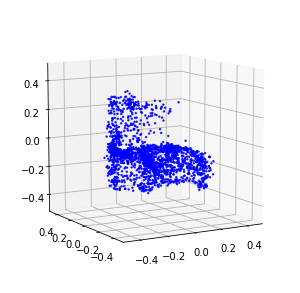

701 (-0.037617269328430944, 0.19004655791365582) 46.9790430069
702 (-0.03811324433949979, 0.18712699348511902) 47.2902891636
703 (-0.03432463239068571, 0.19288948307866635) 47.1868610382
704 (-0.03644263487633156, 0.19406297478986823) 47.2523257732
705 (-0.03596557799078848, 0.17959530748750852) 51.6346569061
706 (-0.03595152250288621, 0.18960957779832507) 47.8740701675
707 (-0.03708871683186811, 0.19128062576055527) 47.2751219273
708 (-0.03690071190990832, 0.19786840418110724) 48.9049730301
709 (-0.03649368589824956, 0.17592951525812564) 43.5883541107
710 (-0.03574024240445831, 0.18042589400125586) 40.0281949043
711 (-0.03504077202599982, 0.1817470996276192) 47.4766249657
712 (-0.03810715223460094, 0.20366938185432684) 47.1083688736
713 (-0.036045559771035025, 0.18001177777414737) 47.149296999
714 (-0.036760119016727676, 0.1898309248297111) 47.3528060913
715 (-0.035276962719533754, 0.20530544610127158) 50.3200569153
716 (-0.036325859140766706, 0.18535047121669934) 47.9799489975
717 (-

In [ ]:
save_syn_data_dir = create_dir(osp.join(synthetic_data_out_dir, experiment_name))

if do_training:
    for _ in range(max_epochs):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params)
        epoch = int(gan.sess.run(gan.increment_epoch))            
        print epoch, loss, duration
        
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=epoch)
            
        if epoch in save_synthetic_samples:
            syn_data = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_data)
            np.savez(osp.join(save_syn_data_dir, 'epoch_' + str(epoch)), syn_data)
            for k in range(2):
                Point_Cloud(syn_data[k]).plot()
        train_stats.append((epoch,) + loss)

In [ ]:
if plot_train_curve:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss, '--')
    plt.plot(x, g_loss)
    plt.title('Latent GAN training. (%s, %s)' %(class_name, ae_loss))
    plt.legend(['Discriminator', 'Generator'], loc=0)
    
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    
    plt.xlabel('Epochs.') 
    plt.ylabel('Loss.')